In [1]:
# Dependencies and Setup 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [2]:
# File to Load CITY-RAW (Remember to Change These)
home_value_city_data_to_load = "resources\City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"

# Read rwa data File and store into Pandas DataFrames
home_value_city_raw = pd.read_csv(home_value_city_data_to_load)


home_value_city_raw = pd.read_csv(home_value_city_data_to_load)
home_value_city_raw

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,252701.0,254520.0,...,711720.0,716349.0,721313.0,727207.0,732201.0,735891.0,738692.0,742776.0,747650.0,753782.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,237081.0,237303.0,...,876405.0,898997.0,912715.0,922531.0,925407.0,929815.0,935460.0,940493.0,949548.0,965684.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,108945.0,108955.0,...,222419.0,227346.0,232692.0,236787.0,240316.0,242730.0,245503.0,248436.0,251793.0,256143.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,168395.0,168797.0,...,292262.0,294721.0,297793.0,299858.0,301899.0,304491.0,306932.0,309246.0,310564.0,312489.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,116080.0,116262.0,...,244883.0,250291.0,256005.0,259832.0,263958.0,267630.0,272340.0,277101.0,281583.0,287310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22392,18290,29449,Glen Campbell,City,PA,PA,Indiana,Indiana County,NaN,NaN,...,87814.0,88161.0,88638.0,88576.0,89271.0,89162.0,90290.0,91037.0,92052.0,92296.0
22393,54975,29449,Village Mills,City,TX,TX,NaN,Tyler County,NaN,NaN,...,185756.0,186999.0,188858.0,191127.0,192045.0,193072.0,195945.0,199530.0,203183.0,204679.0
22394,42575,29449,Quinwood,City,WV,WV,NaN,Greenbrier County,NaN,NaN,...,34241.0,34504.0,34558.0,34540.0,34535.0,34605.0,34623.0,34810.0,34789.0,34806.0
22395,45368,29449,Friendsville,City,PA,PA,NaN,Susquehanna County,NaN,NaN,...,172115.0,173178.0,174633.0,176243.0,177501.0,182659.0,189078.0,196356.0,199243.0,200081.0


In [3]:
#change raw csv to melt and upivoted : date and price
home_value_city_unpivoted = home_value_city_raw.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'], var_name='date', value_name='price')
home_value_city_unpivoted.head(20)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,date,price
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,2000-01-31,252701.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2000-01-31,237081.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,2000-01-31,108945.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,2000-01-31,168395.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,2000-01-31,116080.0
5,13271,5,Philadelphia,City,PA,PA,Philadelphia-Camden-Wilmington,Philadelphia County,2000-01-31,74090.0
6,40326,6,Phoenix,City,AZ,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,2000-01-31,123754.0
7,18959,7,Las Vegas,City,NV,NV,Las Vegas-Henderson-Paradise,Clark County,2000-01-31,164871.0
8,54296,8,San Diego,City,CA,CA,San Diego-Carlsbad,San Diego County,2000-01-31,231226.0
9,38128,9,Dallas,City,TX,TX,Dallas-Fort Worth-Arlington,Dallas County,2000-01-31,120023.0


In [4]:
#clean data frame : dropNa on home_value_city_unpivoted
home_value_city_unpivoted_dropna = home_value_city_unpivoted.dropna()
home_value_city_unpivoted_dropna

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,date,price
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,2000-01-31,252701.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2000-01-31,237081.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,2000-01-31,108945.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,2000-01-31,168395.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,2000-01-31,116080.0
...,...,...,...,...,...,...,...,...,...,...
5979990,45716,29449,Henderson,City,IL,IL,Galesburg,Knox County,2022-03-31,87445.0
5979991,9618,29449,Harrisville,City,NY,NY,Ogdensburg-Massena,Saint Lawrence County,2022-03-31,112740.0
5979992,17064,29449,Bloomdale,City,OH,OH,Toledo,Wood County,2022-03-31,101595.0
5979993,236350,29449,Palisades,City,TX,TX,Amarillo,Randall County,2022-03-31,197254.0


In [5]:
#save file to sumerry folder
home_value_city_unpivoted_dropna.to_csv('Clean Resources\home_value_city_unpivoted_dropna.csv')

In [6]:
#get data base on california state
CA_city_df = home_value_city_unpivoted_dropna.loc[home_value_city_unpivoted_dropna['State'] == "CA"]
CA_city_df


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,date,price
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2000-01-31,237081.0
8,54296,8,San Diego,City,CA,CA,San Diego-Carlsbad,San Diego County,2000-01-31,231226.0
11,33839,11,San Jose,City,CA,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,2000-01-31,390074.0
14,20330,14,San Francisco,City,CA,CA,San Francisco-Oakland-Hayward,San Francisco County,2000-01-31,463867.0
30,20288,30,Sacramento,City,CA,CA,Sacramento--Roseville--Arden-Arcade,Sacramento County,2000-01-31,134964.0
...,...,...,...,...,...,...,...,...,...,...
5979661,45592,29449,Guinda,City,CA,CA,Sacramento--Roseville--Arden-Arcade,Yolo County,2022-03-31,511134.0
5979677,51232,29449,California Hot Springs,City,CA,CA,Visalia-Porterville,Tulare County,2022-03-31,218416.0
5979705,40858,29449,Shasta,City,CA,CA,Redding,Shasta County,2022-03-31,398393.0
5979729,9731,29449,Cassel,City,CA,CA,Redding,Shasta County,2022-03-31,279060.0


In [7]:
State_city_df = CA_city_df.groupby(['RegionName' , 'RegionID'])


State_city_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,date,price
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2000-01-31,237081.0
8,54296,8,San Diego,City,CA,CA,San Diego-Carlsbad,San Diego County,2000-01-31,231226.0
11,33839,11,San Jose,City,CA,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,2000-01-31,390074.0
14,20330,14,San Francisco,City,CA,CA,San Francisco-Oakland-Hayward,San Francisco County,2000-01-31,463867.0
30,20288,30,Sacramento,City,CA,CA,Sacramento--Roseville--Arden-Arcade,Sacramento County,2000-01-31,134964.0
...,...,...,...,...,...,...,...,...,...,...
5978313,49955,27048,Vina,City,CA,CA,Red Bluff,Tehama County,2022-03-31,302454.0
5978517,54061,27408,Randsburg,City,CA,CA,Bakersfield,Kern County,2022-03-31,106736.0
5979374,44996,29114,Duncans Mills,City,CA,CA,Santa Rosa,Sonoma County,2022-03-31,737289.0
5979661,45592,29449,Guinda,City,CA,CA,Sacramento--Roseville--Arden-Arcade,Yolo County,2022-03-31,511134.0


In [8]:

citis = State_city_df["RegionName"].nunique()
Average =State_city_df["price"].mean()
variance =State_city_df["price"].var()
std =State_city_df["price"].std()
sem =State_city_df["price"].sem()

State_Summary_Statistics = pd.DataFrame({
    
    'average_home_price':Average,
    'Variance_home_price':variance,
    'Standard_Deviation_home_price':std,
    'SEM_home_price':sem
})
State_Summary_Statistics
State_Summary_Statistics.head()


,,average_home_price,Variance_home_price,Standard_Deviation_home_price,SEM_home_price
RegionName,RegionID,,,,
Acampo,43820,446933.752809,2.074350e+10,144026.027372,8814.249733
Acton,16677,492751.419476,1.796704e+10,134041.187123,8203.187433
Adelanto,16684,175062.074906,4.861886e+09,69727.222998,4267.236748
Agoura Hills,9840,738445.295880,3.266598e+10,180737.317745,11060.944218
Agua Dulce,16691,575876.127341,2.123526e+10,145723.232083,8918.116974


In [9]:
# describe base on price ( extera )
State_city_df['price'].describe()

,,count,mean,std,min,25%,50%,75%,max
RegionName,RegionID,,,,,,,,
Acampo,43820,267.0,446933.752809,144026.027372,228343.0,317346.0,414505.0,559896.0,825075.0
Acton,16677,267.0,492751.419476,134041.187123,250974.0,399950.0,494473.0,600830.0,863457.0
Adelanto,16684,267.0,175062.074906,69727.222998,88046.0,105082.0,164251.0,234287.5,364552.0
Agoura Hills,9840,267.0,738445.295880,180737.317745,369887.0,624359.5,765557.0,875490.0,1230220.0
Agua Dulce,16691,267.0,575876.127341,145723.232083,309519.0,466229.0,566153.0,674415.0,946457.0
...,...,...,...,...,...,...,...,...,...
Yorba Linda,21412,267.0,716177.277154,176236.286230,348914.0,607590.5,744268.0,845045.5,1247646.0
Yountville,55293,267.0,949853.737828,172232.925592,571208.0,805669.5,955892.0,1064389.5,1324769.0
Yuba City,34940,218.0,258880.954128,62306.334229,181983.0,204411.0,247888.5,301839.0,444618.0


In [10]:
#sort to find top 5 state
citis_df2 = pd.DataFrame({'price': Average}).sort_values(['price'], ascending=False)                                             
                                                                                                                
citis_df2.head()


,,price
RegionName,RegionID,
Atherton,30280,5.026530e+06
Los Altos Hills,32578,3.405975e+06
Belvedere,10348,3.282814e+06
Hillsborough,55743,3.270127e+06
Montecito,39843,3.155226e+06


In [11]:
citis_df2_top5 = citis_df2.head(5)
citis_df2_top5

,,price
RegionName,RegionID,
Atherton,30280,5.026530e+06
Los Altos Hills,32578,3.405975e+06
Belvedere,10348,3.282814e+06
Hillsborough,55743,3.270127e+06
Montecito,39843,3.155226e+06


<AxesSubplot:title={'center':'price'}, xlabel='RegionName'>

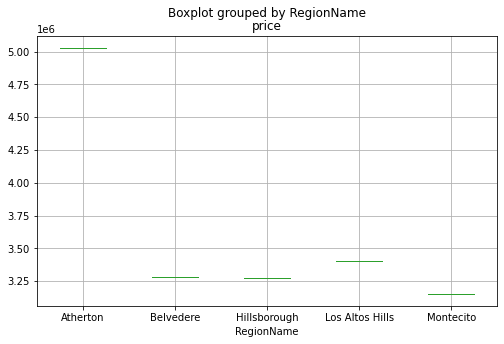

In [12]:
# Create a boxplot to compare top 5 city in california state from 2000 to march 2022
citis_df2_top5.boxplot("price", by="RegionName", figsize=(8, 5))



In [13]:
group0 = home_value_city_unpivoted_dropna[home_value_city_unpivoted_dropna["RegionID"] == 30280]["price"] #
group1 = home_value_city_unpivoted_dropna[home_value_city_unpivoted_dropna["RegionID"] == 32578]["price"] #
group2 = home_value_city_unpivoted_dropna[home_value_city_unpivoted_dropna["RegionID"] == 10348]["price"] #
group3 = home_value_city_unpivoted_dropna[home_value_city_unpivoted_dropna["RegionID"] == 55743]["price"] #
group4 = home_value_city_unpivoted_dropna[home_value_city_unpivoted_dropna["RegionID"] == 39843]["price"] #


stats.f_oneway(group0, group1, group2, group3 ,group4)

F_onewayResult(statistic=206.69941708214913, pvalue=6.112212677528717e-138)

In [14]:
#p-value greater than 0.05
# If the p-value is large (> 0.05), it indicates weak evidence against the null hypothesis.
#As a result, the null hypothesis is not rejected.
#Thus for a hypothesis with a p-value greater than 0.05, the null hypothesis is not rejected, and the alternative hypothesis is not accepted.
#This means that the results of the research/ study are not statistically significant.

#p-value less than 0.05  *************************
#If the p-value is small (< 0.05), it indicates a piece of strong evidence against the null hypothesis.
#As a result, the null hypothesis is rejected.
#Thus for a hypothesis with a p-value less than 0.05, the null hypothesis is rejected, and the alternative hypothesis is accepted.
#This means that the results of the research/ study are statistically significant.